In [1]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

## Download Images into tf.images.dataset

In [2]:
Image_size = 256
Batch_size = 32
Channels = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Potato_Data',
    shuffle=True,
    image_size= (Image_size,Image_size),
    batch_size= Batch_size
)

Found 2152 files belonging to 3 classes.
Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

68

## Data visualization

In [6]:
for image_batch , label_batch in dataset.take(1) :  # It gives us one batch which equals to 32 images 
    print(image_batch[0].numpy()) # because it is a tensor 


[[[116. 107. 110.]
  [111. 102. 105.]
  [111. 102. 105.]
  ...
  [133. 127. 129.]
  [144. 138. 140.]
  [154. 148. 150.]]

 [[102.  93.  96.]
  [104.  95.  98.]
  [111. 102. 105.]
  ...
  [139. 133. 135.]
  [142. 136. 138.]
  [147. 141. 143.]]

 [[ 96.  87.  90.]
  [101.  92.  95.]
  [109. 100. 103.]
  ...
  [142. 136. 138.]
  [142. 136. 138.]
  [143. 137. 139.]]

 ...

 [[148. 146. 151.]
  [142. 140. 145.]
  [118. 116. 121.]
  ...
  [179. 177. 182.]
  [178. 176. 181.]
  [178. 176. 181.]]

 [[134. 132. 137.]
  [125. 123. 128.]
  [100.  98. 103.]
  ...
  [181. 179. 184.]
  [182. 180. 185.]
  [182. 180. 185.]]

 [[161. 159. 164.]
  [139. 137. 142.]
  [ 98.  96. 101.]
  ...
  [174. 172. 177.]
  [175. 173. 178.]
  [176. 174. 179.]]]
[[[116. 107. 110.]
  [111. 102. 105.]
  [111. 102. 105.]
  ...
  [133. 127. 129.]
  [144. 138. 140.]
  [154. 148. 150.]]

 [[102.  93.  96.]
  [104.  95.  98.]
  [111. 102. 105.]
  ...
  [139. 133. 135.]
  [142. 136. 138.]
  [147. 141. 143.]]

 [[ 96.  87.  90.]

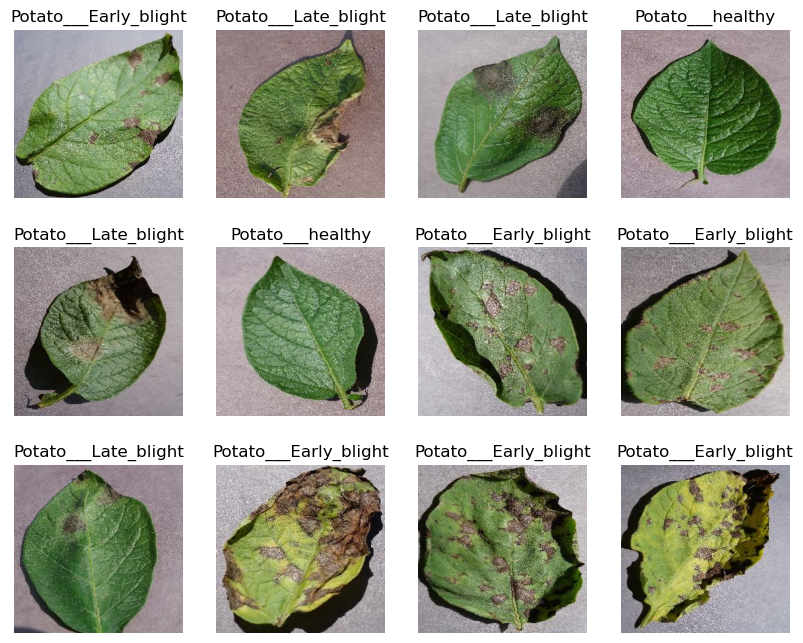

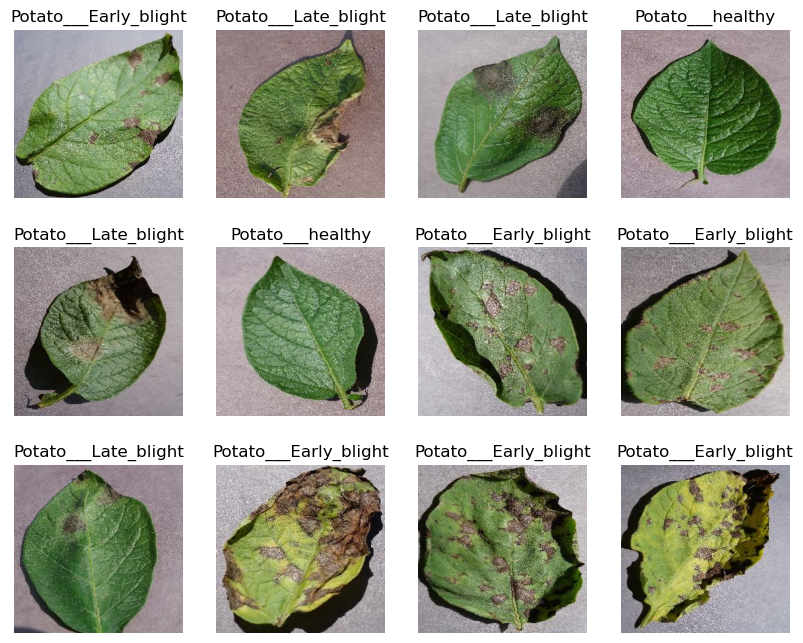

In [7]:


plt.figure(figsize=(10,8))
for image_batch , label_batch in dataset.take (1) :
    for i in range(12) :
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

## Train Test Split

In [8]:
len(dataset)

68

68

In [9]:
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset,len(dataset))

In [11]:
print('Length of Train ds :',len(train_ds))
print('Length of Validation ds :',len(val_ds))
print('Length of Test ds :',len(test_ds))

Length of Train ds : 54
Length of Validation ds : 6
Length of Test ds : 8
Length of Train ds : 54
Length of Validation ds : 6
Length of Test ds : 8


In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
resizing_rescaling = tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [14]:
data_augmentation = tf.keras.Sequential([
    
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

# Model building

In [15]:
input_shape = (Batch_size,Image_size,Image_size,Channels)
n_classes = 3 
model = models.Sequential([
    
    resizing_rescaling,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=input_shape)

In [16]:
model.summary()

Model: "sequential_2"
Model: "sequential_2"
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                

In [17]:
model.compile( 
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics='accuracy'
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=20,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds,
    
)

Epoch 1/20
Epoch 1/20
54/54 [==============================] - 68s 1s/step - loss: 0.8989 - accuracy: 0.4919 - val_loss: 0.8544 - val_accuracy: 0.4479
Epoch 2/20
Epoch 2/20
54/54 [==============================] - 59s 1s/step - loss: 0.6179 - accuracy: 0.7130 - val_loss: 0.5017 - val_accuracy: 0.7760
Epoch 3/20
Epoch 3/20
54/54 [==============================] - 57s 1s/step - loss: 0.3940 - accuracy: 0.8304 - val_loss: 0.3600 - val_accuracy: 0.8438
Epoch 4/20
Epoch 4/20
27/54 [==============>...............] - ETA: 27s - loss: 0.2711 - accuracy: 0.9005

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(10),acc,label='Training-Acurracy')
plt.plot(range(10),val_accuracy,label='Validation-Acurracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 2)
plt.plot(range(10),loss,label='Training-Loss')
plt.plot(range(10),val_loss,label='Validation-Loss')
plt.legend(loc='lower right')
plt.title('Training vs Validation loss')

plt.show()

In [ ]:
for image_batch,label_batch in test_ds.take(1) :
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]
    
    print('first image to predict')
    plt.imshow(first_image)
    print('actual label :',class_names[first_label])
    
    batch_pred = model.predict(image_batch)
    print('predicted class :',class_names[np.argmax(batch_pred[0])])